# 1. Installing Obspy and preparing our codes

## 1.1 Install obspy

In [ ]:
import sys

if 'google.colab' in sys.modules:
    !pip install obspy obsplus

Cloning into '/content/FieldCampII_2025'...
remote: Enumerating objects: 210, done.
remote: Counting objects: 100% (99/99), done.
remote: Compressing objects: 100% (78/78), done.
remote: Total 210 (delta 33), reused 80 (delta 16), pack-reused 111 (from 3)
Receiving objects: 100% (210/210), 335.17 MiB | 20.05 MiB/s, done.
Resolving deltas: 100% (36/36), done.
Updating files: 100% (104/104), done.


## 1.2. Clone Field Camp II Library (fc2)

In [34]:
!git clone https://github.com/ecastillot/FieldCampII_2025.git /content/FieldCampII_2025

Cloning into '/content/FieldCampII_2025'...
remote: Enumerating objects: 239, done.
remote: Counting objects: 100% (128/128), done.
remote: Compressing objects: 100% (107/107), done.
remote: Total 239 (delta 33), reused 109 (delta 16), pack-reused 111 (from 3)
Receiving objects: 100% (239/239), 670.64 MiB | 22.33 MiB/s, done.
Resolving deltas: 100% (36/36), done.
Updating files: 100% (128/128), done.


In [ ]:
import sys
lib = "/content/FieldCampII_2025"
sys.path.append(lib)

# 1.3. Test

In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from obspy import UTCDateTime
from fc2.seismic import read_waveforms,read_stations,read_shots

# 2. Installing Seismic Unix

## 2.1. Install dependencies

In [ ]:
# Step 1: Install dependencies
!apt-get update

!apt-get install -y --reinstall -y build-essential make gcc gfortran libtirpc-dev libmotif-dev\
    libx11-dev libxt-dev libxext-dev xorg libxaw7-dev libtirpc-dev \
    xvfb x11-utils git wget imagemagick ghostscript

# Download Seismic Unix (version 44R23 as an example, check for the latest)
!mkdir /content/SU
!wget "https://nextcloud.seismic-unix.org/s/LZpzc8jMzbWG9BZ/download?path=/&files=cwp_su_all_44R28.tgz" -O /content/SU/cwp_su_all_44R28.tgz
!tar -xzf /content/SU/cwp_su_all_44R28.tgz -C /content/SU

Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,632 B]
Get:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:3 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:4 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Hit:5 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:6 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:7 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease [18.1 kB]
Hit:8 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:10 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Get:11 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [1,741 kB]
Get:12 https://r2u.stat.illinois.edu/ubuntu jammy/main all Packages [9,008 kB]
Get:13 https://r2u.stat.illinois.edu/ubu

## 2.2 Install SU

In [ ]:
import os
os.environ['CWPROOT'] = '/content/SU'
os.environ['PATH'] += f":{os.environ['CWPROOT']}/bin"
# Step 4: Compile core tools
!cp /content/SU/src/configs/Makefile.config_Linux_Ubuntu_22.04 /content/SU/src/Makefile.config
%cd /content/SU/src
!make clean
!make install
!make xtinstall

/content/SU/src
make: *** No rule to make target 'clean'.  Stop.
Installing the CWP codes under the ROOT = /content/SU
Continue install? [y/n] y
/content/SU
Making necessary directories
mkdir: cannot create directory ‘/content/SU’: File exists
mkdir: cannot create directory ‘/content/SU/bin’: File exists
mkdir: cannot create directory ‘/content/SU/lib’: File exists
mkdir: cannot create directory ‘/content/SU/include’: File exists
mkdir: cannot create directory ‘/content/SU/include/Xtcwp’: File exists
mkdir: cannot create directory ‘/content/SU/lib/X11’: File exists
mkdir: cannot create directory ‘/content/SU/lib/X11/app-defaults’: File exists
mkdir: cannot create directory ‘/content/SU/include/Xmcwp’: File exists
mkdir: cannot create directory ‘/content/SU/include/Triangles’: File exists
mkdir: cannot create directory ‘/content/SU/include/Wpc’: File exists
mkdir: cannot create directory ‘/content/SU/include/MGL’: File exists
mkdir: cannot create directory ‘/content/SU/include/Reflect’:

## 2.3. Test

GPL Ghostscript 9.55.0 (2021-09-27)
Copyright (C) 2021 Artifex Software, Inc.  All rights reserved.
This software is supplied under the GNU AGPLv3 and comes with NO WARRANTY:
see the file COPYING for details.
Loading NimbusSans-Regular font from /usr/share/ghostscript/9.55.0/Resource/Font/NimbusSans-Regular... 4486476 2932388 1609392 314512 2 done.
Loading NimbusSans-Bold font from /usr/share/ghostscript/9.55.0/Resource/Font/NimbusSans-Bold... 4552588 3117416 1629592 323226 2 done.


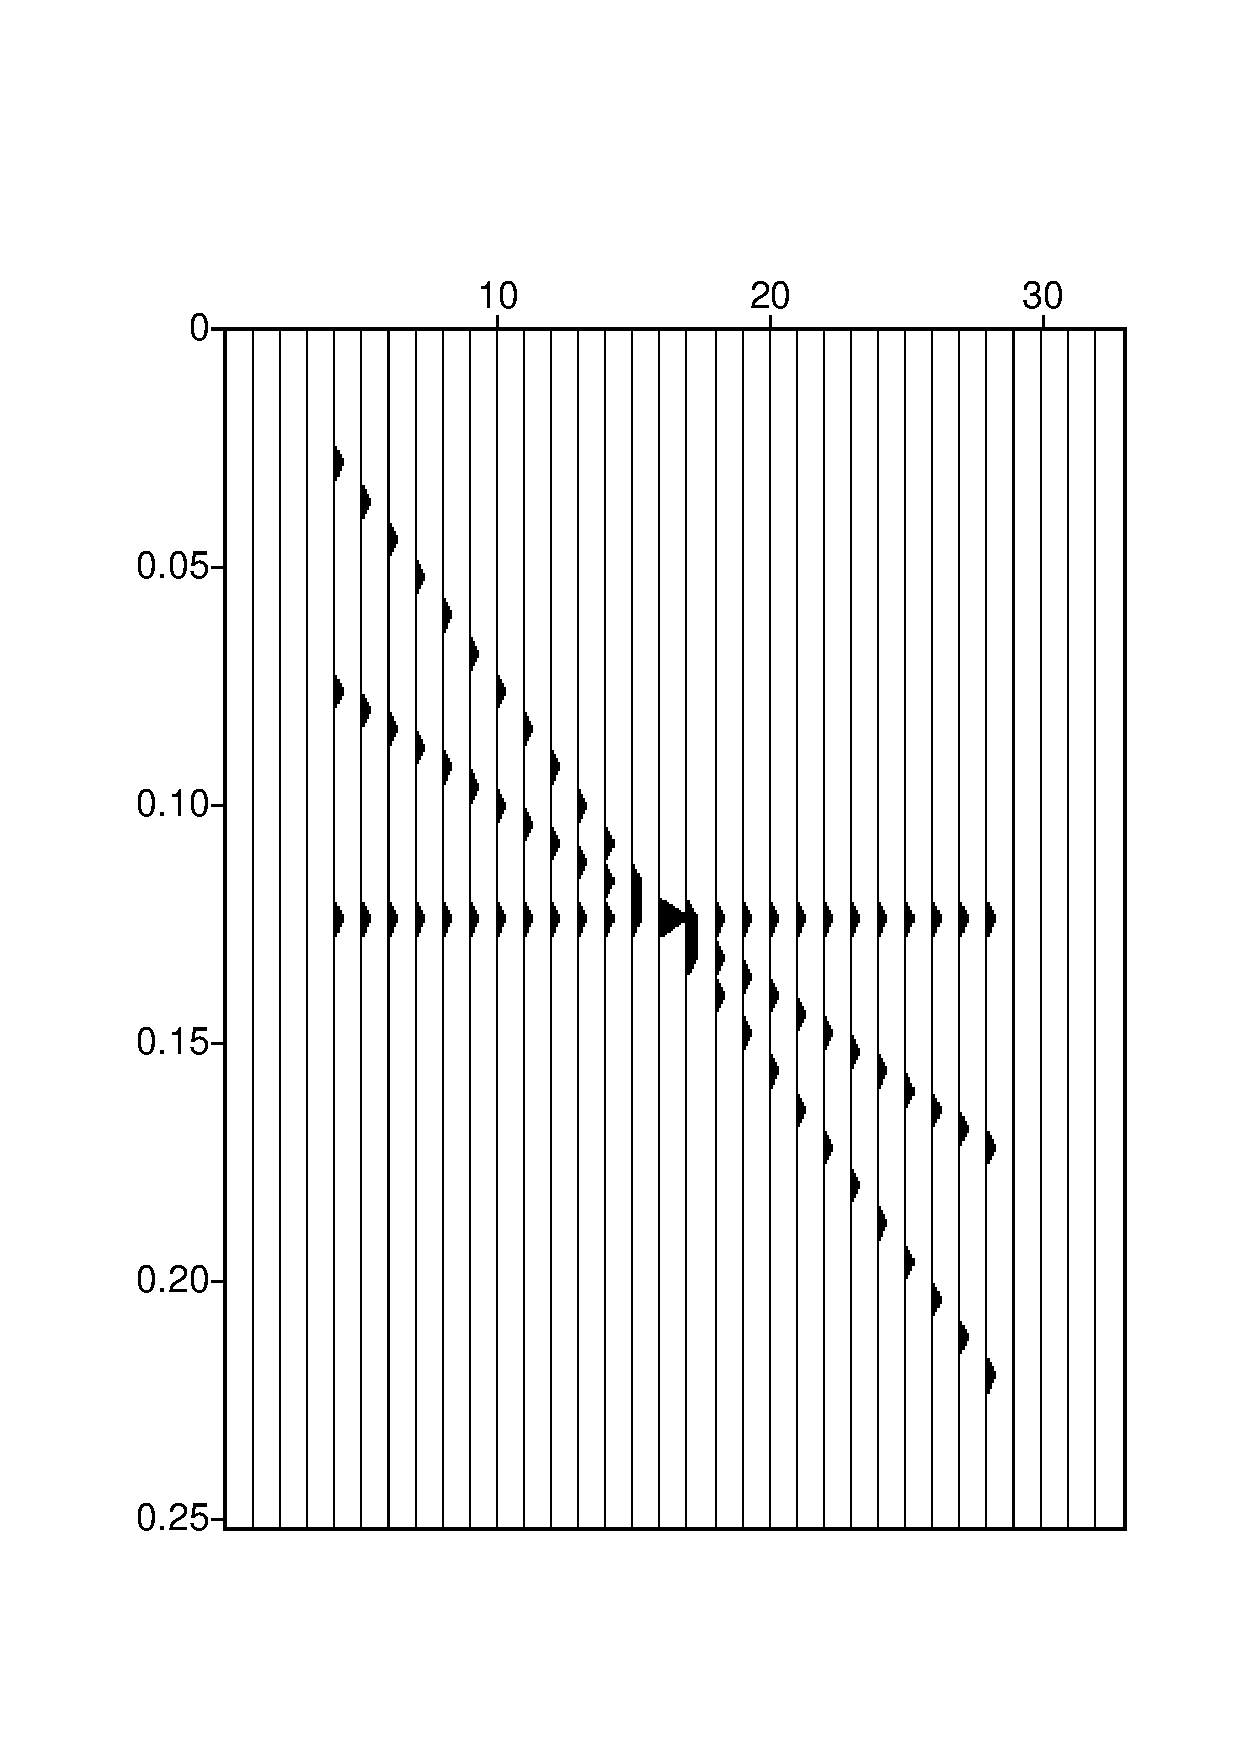

In [28]:
os.environ['PATH']
! a2b
!gs -dSAFER -dBATCH -dNOPAUSE -sDEVICE=png16m -r150 -sOutputFile=/content/supswigb.png /content/supswigb.eps
from IPython.display import Image, display

display(Image("/content/supswigb.png"))

# 3. Read data & Convert to SU format

In [45]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from obspy import UTCDateTime
from fc2.seismic import read_shots

PROJECT = '/content/FC2_reflection'

SHOT_folder = os.path.join(PROJECT,'SHOT') # for shots
WAV_folder = os.path.join(PROJECT,'WAV') # for waveform
PROC_folder = os.path.join(PROJECT,'PROC') # for processing
os.makedirs(SHOT_folder,exist_ok=True)
os.makedirs(WAV_folder,exist_ok=True)
os.makedirs(PROC_folder,exist_ok=True)

## 3.1 Shots

### 3.1.1 Native Smartsolo Shots file

The native SmartSolo shots file looks like this:

In [74]:
shots_path = "/content/FieldCampII_2025/data/ROC_S_050725/SourceTesting/TB_INT00142.csv"
print(f"Content in {shots_path}\n")
with open(shots_path) as f:
    for i in range(11):
        line = f.readline()
        print(line.strip())
print('...')

Content in /content/FieldCampII_2025/data/ROC_S_050725/SourceTesting/TB_INT00142.csv

week=2365,ms=315255879,Subms=373058
Longitude: 96.75810 W  Latitude: 32.98688 N

week=2365,ms=316410402,Subms=446859
Longitude: 96.75804 W  Latitude: 32.98691 N

week=2365,ms=316416822,Subms=524974
Longitude: 96.75804 W  Latitude: 32.98691 N

week=2365,ms=316422495,Subms=557254
Longitude: 96.75804 W  Latitude: 32.98691 N
...


### 3.1.2 Readable Smartsolo Shots file

We need to convert it to readable format. Let's convert it to csv (separated by comma) format

In [83]:
name, ext = os.path.splitext(os.path.basename(shots_path))
shots_fc2_path = os.path.join(SHOT_folder,f'{name}_fc2_src.csv')

# read shots function
shots_df = read_shots(shots_path)
shots_df.to_csv(shots_fc2_path,index=False)
print(f'Conversion: {shots_path} -> {shots_fc2_path}')
display(shots_df.head())

Conversion: /content/FieldCampII_2025/data/ROC_S_050725/SourceTesting/TB_INT00142.csv -> /content/FC2_reflection/SHOT/TB_INT00142_fc2_src.csv


,shot,year,month,day,hour,minute,second,latitude,longitude
0,1,2025,5,7,15,34,16.25,32.99,96.76
1,2,2025,5,7,15,53,30.85,32.99,96.76
2,3,2025,5,7,15,53,37.35,32.99,96.76
3,4,2025,5,7,15,53,43.05,32.99,96.76
4,5,2025,5,7,15,53,49.00,32.99,96.76


### 3.1.3 Seismic Unix Source file

Now it's time to convert that to SU format

In [84]:
# Extract directory and filename
shots_dir = os.path.dirname(shots_fc2_path)
filename = os.path.basename(shots_fc2_path)
name_no_ext = os.path.splitext(filename)[0]

# Construct shell command using raw string and correct escaping
cmd = f"""
cd "{shots_dir}" && \
awk -F"," 'NR>1 {{printf "%d %10.5f %10.5f %10.1f\\n", $1, $8*100, $9*100, 100}}' "{filename}" > "{name_no_ext}.txt" && \
a2b < "{name_no_ext}.txt" > "{name_no_ext}.bin" n1=4
"""
#print(cmd)
os.system(cmd)

print(f"List of files in {SHOT_folder} ->",os.listdir(SHOT_folder))

List of files in /content/FC2_reflection/SHOT -> ['TB_INT00142_fc2_src.bin', 'TB_INT00142_fc2_src.csv', '.ipynb_checkpoints', 'TB_INT00142_fc2_src.txt']


## 3.2 Geometry (Not resolved yet)

In [85]:
from obspy.io.segy.segy import _read_segy

# Load SEGY file
path = "/content/FieldCampII_2025/data/ROC_S_050725/ROC_2025_SEGY/453024131.0001.2025.05.07.15.42.27.000.ENZ.segy"
stream = _read_segy(path, headonly=True)

# Loop through traces and extract coordinates
for tr in stream.traces:
    sx = tr.header.source_coordinate_x
    sy = tr.header.source_coordinate_y
    gx = tr.header.group_coordinate_x
    gy = tr.header.group_coordinate_y
    print(f"Source: ({sx}, {sy}), Receiver: ({gx}, {gy})")

Source: (0, 0), Receiver: (-999990000, -999990000)
Source: (0, 0), Receiver: (-999990000, -999990000)
Source: (0, 0), Receiver: (-999990000, -999990000)
Source: (0, 0), Receiver: (-999990000, -999990000)
Source: (0, 0), Receiver: (-999990000, -999990000)
Source: (0, 0), Receiver: (-999990000, -999990000)
Source: (0, 0), Receiver: (-999990000, -999990000)
Source: (0, 0), Receiver: (-999990000, -999990000)
Source: (0, 0), Receiver: (-999990000, -999990000)
Source: (0, 0), Receiver: (-999990000, -999990000)
Source: (0, 0), Receiver: (-999990000, -999990000)
Source: (0, 0), Receiver: (-999990000, -999990000)
Source: (0, 0), Receiver: (-999990000, -999990000)
Source: (0, 0), Receiver: (-999990000, -999990000)
Source: (0, 0), Receiver: (-999990000, -999990000)
Source: (0, 0), Receiver: (-999990000, -999990000)
Source: (0, 0), Receiver: (-999990000, -999990000)
Source: (0, 0), Receiver: (-999990000, -999990000)
Source: (0, 0), Receiver: (-999990000, -999990000)
Source: (0, 0), Receiver: (-999

## 3.3 Waveforms

### 3.3.1 Convert SEGY to SU Format

In [86]:
segy_dir = "/content/FieldCampII_2025/data/ROC_S_050725/ROC_2025_SEGY"

for file in os.listdir(segy_dir):
    if file.endswith(".segy"):
        base = os.path.splitext(file)[0]
        out_wav_path = os.path.join(WAV_folder,f'{base}.su')
        #read, Sets the fldr (field record number) to 1 for all traces.
        #Sets the ep (ensemble/shot number) to 1,
        #Sets tracf (trace number within field record) to 1
        cmd = f"""
        cd {segy_dir} && \
        segyread tape={file} | \
        sushw key=fldr a=1 | \
        sushw key=ep a=1 | \
        suputhead key=tracf a=1 > {out_wav_path}
        """
        #print(cmd)
        os.system(cmd)

print(f"List of files in {WAV_folder} ->",os.listdir(WAV_folder))


List of files in /content/FC2_reflection/WAV -> ['453026165.0001.2025.05.07.15.44.42.000.ENZ.su', '453024589.0001.2025.05.07.15.43.21.000.ENZ.su', '453026138.0001.2025.05.07.15.44.54.000.ENZ.su', '453026185.0001.2025.05.07.15.44.51.000.ENZ.su', '453025954.0001.2025.05.07.15.44.51.000.ENZ.su', '453024311.0001.2025.05.07.15.43.48.000.ENZ.su', '453026125.0001.2025.05.07.15.43.57.000.ENZ.su', '453026205.0001.2025.05.07.15.44.21.000.ENZ.su', '453024638.0001.2025.05.07.15.44.24.000.ENZ.su', '453026218.0001.2025.05.07.15.43.21.000.ENZ.su', '453024131.0001.2025.05.07.15.42.27.000.ENZ.su', '453026107.0001.2025.05.07.15.43.32.000.ENZ.su', '453026132.0001.2025.05.07.15.44.02.000.ENZ.su', '453025161.0001.2025.05.07.15.44.24.000.ENZ.su', '453025794.0001.2025.05.07.15.41.51.000.ENZ.su', '453026144.0001.2025.05.07.15.44.24.000.ENZ.su', '453024341.0001.2025.05.07.15.43.48.000.ENZ.su', '453026226.0001.2025.05.07.15.42.57.000.ENZ.su', '453026190.0001.2025.05.07.15.44.27.000.ENZ.su', '453026207.0001.2025

# 4 Processing

## 4.1 Sort and Stack (CDP Processing)